<a href="https://colab.research.google.com/github/vania2911/Data_science_projects/blob/main/spotify_popularity_song_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset_bedu proyecto/playlist_2010to2022.csv')

In [ ]:
df.head(20)

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
5,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,5Mmk2ii6laakqfeCT7OnVD,Thong Song,73,Unleash The Dragon,6x9QLdzo6eBZxJ1bHsDkjg,Sisqo,"['contemporary r&b', 'dirty south rap', 'hip p...",56,...,-6.959,1.0,0.0654,0.11900,0.000096,0.0700,0.714,121.549,253733.0,4.0
6,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,88,The Marshall Mathers LP,7dGJo4pcD2V6oG8kP0tJRR,Eminem,"['detroit hip hop', 'hip hop', 'rap']",88,...,-4.244,0.0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,284200.0,4.0
7,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,7oQSevUCbYs4QawXTHQVV1,Rock DJ,57,Sing When You're Winning,2HcwFjNelS49kFbfvMxQYw,Robbie Williams,"['dance rock', 'europop']",69,...,-4.307,1.0,0.0326,0.02600,0.000000,0.0981,0.842,103.032,260560.0,4.0
8,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,7H6ev70Weq6DdpZyyTmUXk,Say My Name,80,The Writing's On The Wall,1Y8cdNmUJH7yBTd9yOvr5i,Destiny's Child,"['dance pop', 'girl group', 'pop', 'r&b', 'urb...",69,...,-3.525,0.0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,271333.0,4.0
9,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,64BbK9SFKH2jk86U3dGj2P,Otherside,83,Californication (Deluxe Edition),0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,"['alternative rock', 'funk metal', 'funk rock'...",80,...,-3.265,1.0,0.0574,0.00316,0.000202,0.0756,0.513,123.229,255373.0,4.0


In [ ]:
df.columns

Index(['playlist_url', 'year', 'track_id', 'track_name', 'track_popularity',
       'album', 'artist_id', 'artist_name', 'artist_genres',
       'artist_popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
df=df.drop(columns=['playlist_url','artist_id'])

In [ ]:
pd.isnull(df).sum()

year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
time_signature       1
dtype: int64

In [ ]:
df=df.fillna(0)

<ipython-input-776-4a760e192a90>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.track_popularity).set_title('popularity_distribution')


Text(0.5, 1.0, 'popularity_distribution')

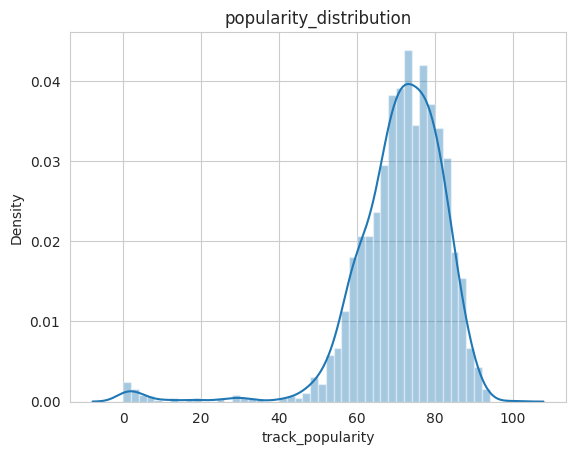

In [ ]:
sns.distplot(df.track_popularity).set_title('popularity_distribution')

In [ ]:
df.corr(method='pearson')


<ipython-input-777-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
year,1.000000,0.218578,0.463891,0.081321,-0.210476,-0.011633,-0.088557,-0.007487,0.026837,0.144311,-0.071034,-0.027100,-0.191122,0.030375,-0.335511,-0.007558
track_popularity,0.218578,1.000000,0.331063,0.007334,-0.073563,-0.047691,-0.018816,0.019974,-0.027044,0.058383,-0.020836,-0.019889,-0.066974,-0.013056,-0.043126,-0.034682
artist_popularity,0.463891,0.331063,1.000000,0.029957,-0.107210,-0.029071,-0.029868,-0.043811,0.049247,0.061315,-0.073646,0.004615,-0.124605,-0.008548,-0.022464,-0.004707
danceability,0.081321,0.007334,0.029957,1.000000,-0.031748,0.039420,0.023085,-0.120244,0.172405,-0.103164,0.018463,-0.081567,0.411939,-0.183262,-0.093553,0.114882
energy,-0.210476,-0.073563,-0.107210,-0.031748,1.000000,0.006949,0.682355,-0.053651,-0.004030,-0.540215,0.009405,0.150708,0.391133,0.132566,-0.030287,0.154741
key,-0.011633,-0.047691,-0.029071,0.039420,0.006949,1.000000,0.002310,-0.145007,0.009587,-0.010219,-0.009677,-0.027079,0.034964,0.000808,-0.003587,-0.027424
loudness,-0.088557,-0.018816,-0.029868,0.023085,0.682355,0.002310,1.000000,-0.028200,-0.039225,-0.415183,-0.124382,0.083115,0.303585,0.087028,-0.088574,0.048411
mode,-0.007487,0.019974,-0.043811,-0.120244,-0.053651,-0.145007,-0.028200,1.000000,-0.069198,0.055195,-0.034963,-0.022900,-0.070640,0.037284,0.016003,0.003491
speechiness,0.026837,-0.027044,0.049247,0.172405,-0.004030,0.009587,-0.039225,-0.069198,1.000000,-0.036910,-0.056225,0.067093,0.102113,0.068469,0.016921,0.069622
acousticness,0.144311,0.058383,0.061315,-0.103164,-0.540215,-0.010219,-0.415183,0.055195,-0.036910,1.000000,0.002416,-0.094556,-0.203532,-0.092848,0.002750,-0.082193


In [ ]:
df.track_popularity.min()

0

Text(0.5, 1.0, 'Popularity based on time_signature')

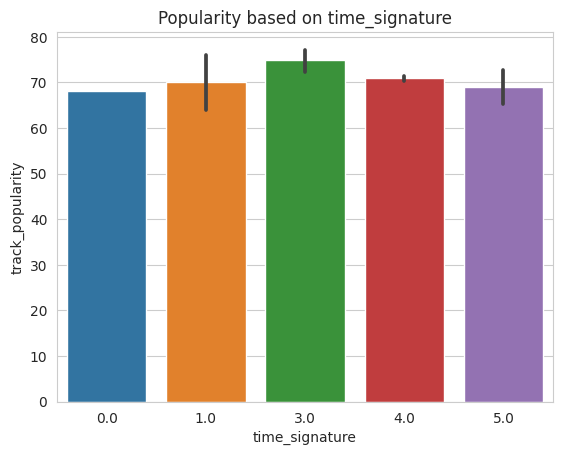

In [ ]:
sns.barplot(x='time_signature', y='track_popularity', data=df)
plt.title('Popularity based on time_signature')

Text(0.5, 1.0, 'Track Popularity based on artist popularity')

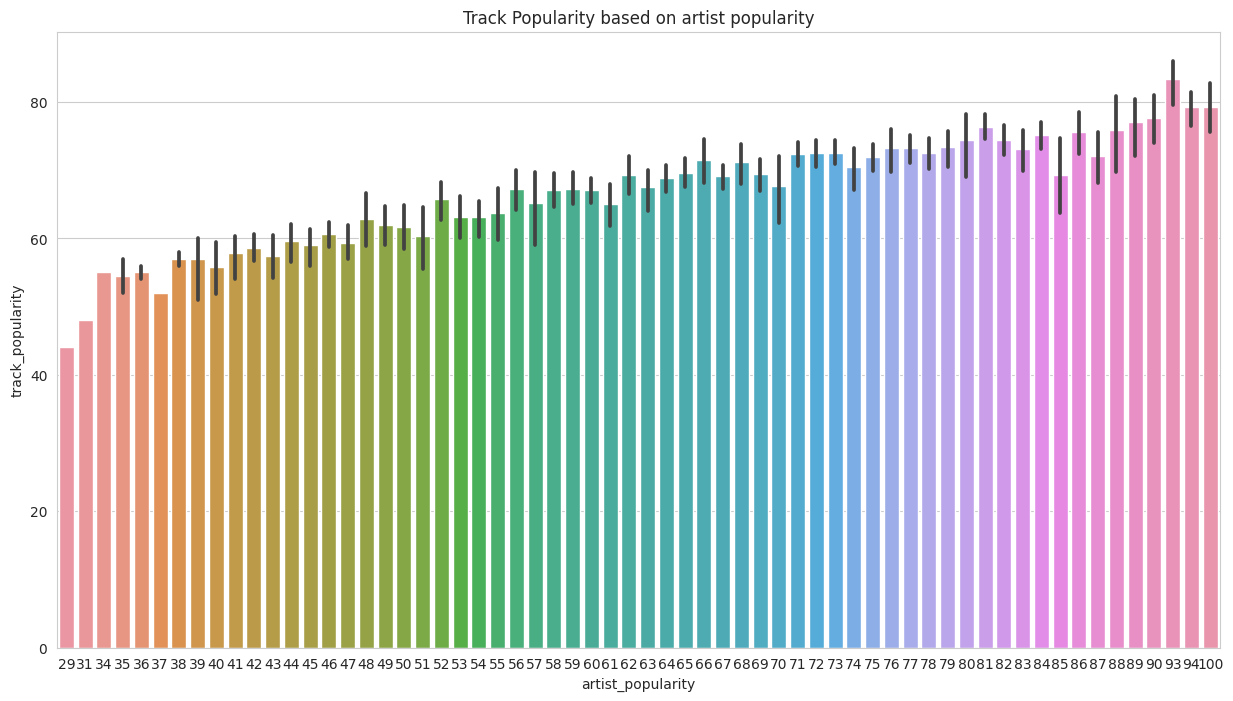

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='artist_popularity', y='track_popularity', data=df)
plt.title('Track Popularity based on artist popularity')

Text(0.5, 1.0, 'Track Popularity based on mode')

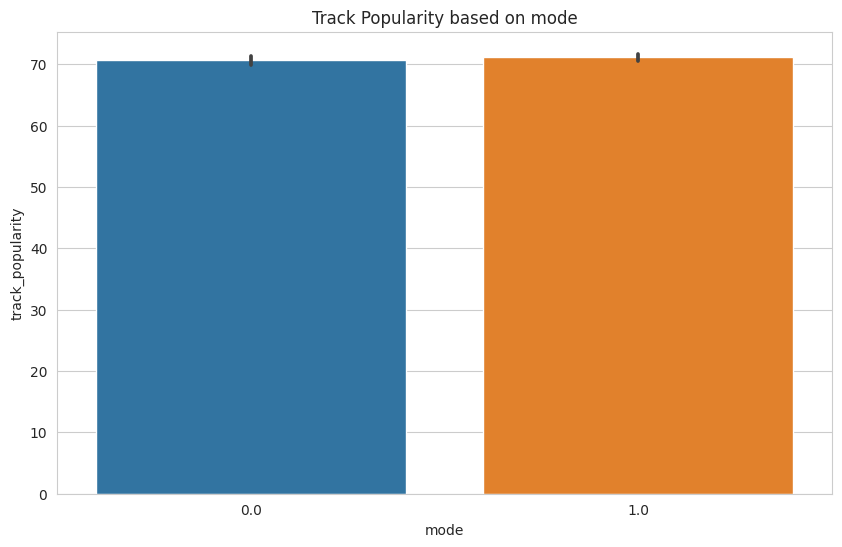

In [ ]:
#popularity based on mode
plt.figure(figsize=(10,6))
sns.barplot(x='mode', y='track_popularity', data=df)
plt.title('Track Popularity based on mode')

Text(0.5, 1.0, 'Track Popularity based on key')

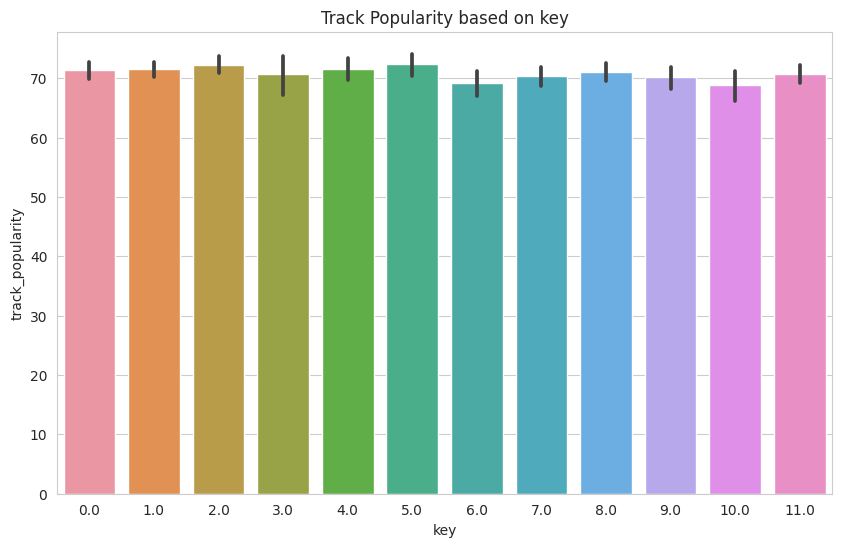

In [ ]:
#popularity based on key
plt.figure(figsize=(10,6))
sns.barplot(x='key', y='track_popularity', data=df)
plt.title('Track Popularity based on key')

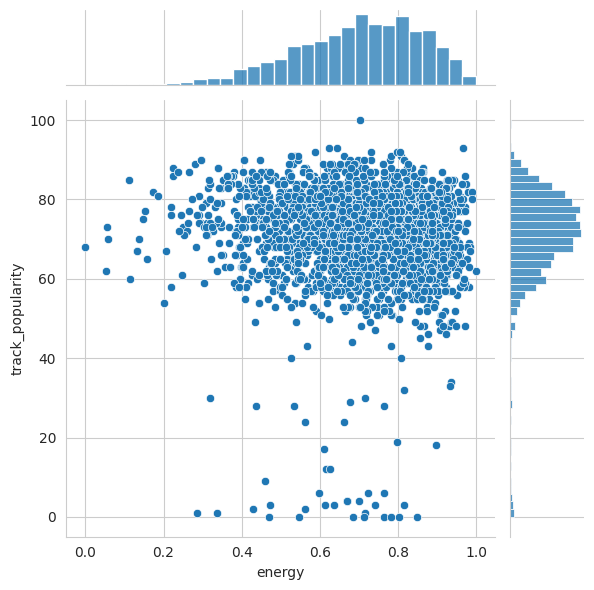

In [ ]:
sns.jointplot(x='energy', y='track_popularity', data=df)

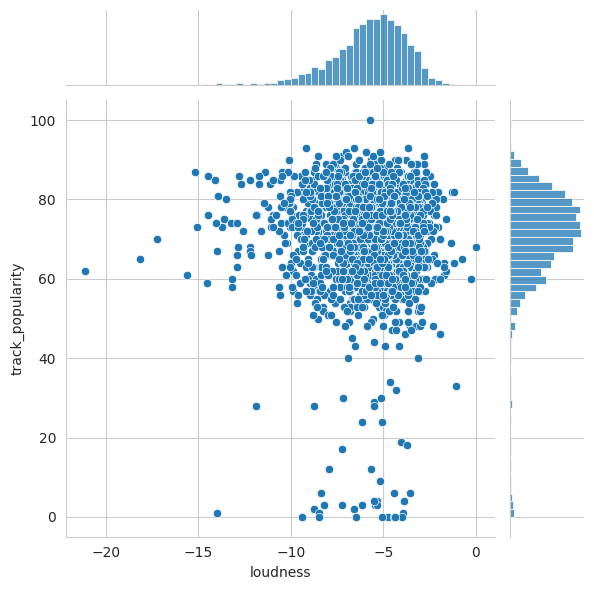

In [ ]:
sns.jointplot(x='loudness', y='track_popularity', data=df)

<ipython-input-785-802841fb7f64>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(popular_above_50['acousticness'])


Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

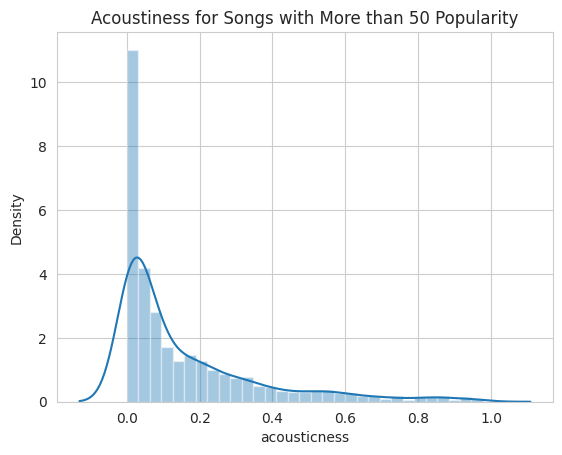

In [ ]:
popular_above_50=df[df.track_popularity>50]
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')

<ipython-input-786-d4fdb394dbfd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(popular_above_50['energy'])


Text(0.5, 1.0, 'Energy for Songs with More than 50 popularity')

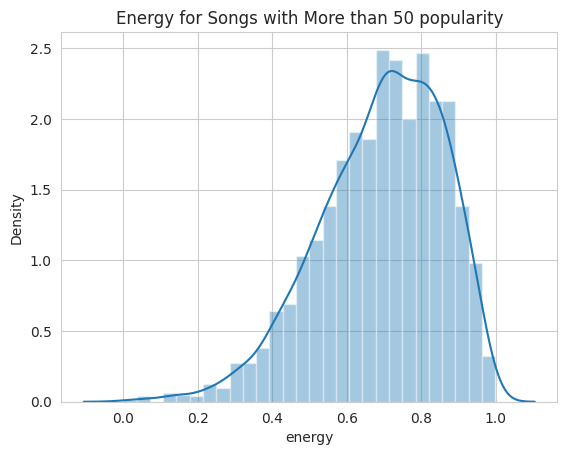

In [ ]:
popular_above_50=df[df.track_popularity>50]
sns.distplot(popular_above_50['energy'])
plt.title('Energy for Songs with More than 50 popularity')

<ipython-input-787-61d57fc0d1ac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(popular_below_50['acousticness'])


Text(0.5, 1.0, 'Acousticness for Songs with Less than 50 Popularity')

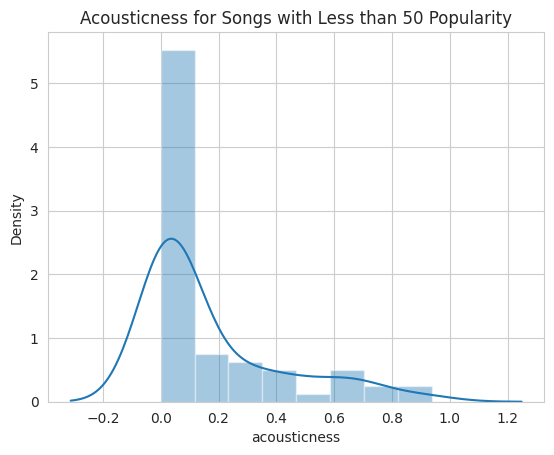

In [ ]:
popular_below_50 = df[df.track_popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acousticness for Songs with Less than 50 Popularity')

<ipython-input-788-4dad9c4b3496>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(popular_below_50['energy'])


Text(0.5, 1.0, 'Energy for Songs with More than 50 popularity')

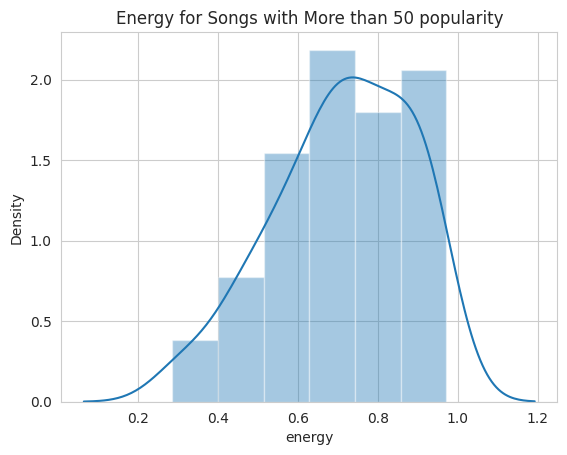

In [ ]:
popular_below_50=df[df.track_popularity<50]
sns.distplot(popular_below_50['energy'])
plt.title('Energy for Songs with More than 50 popularity')

In [ ]:
df['track_popularity']=np.where(df['track_popularity']>=70,1,0)
df

,year,track_id,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,1,Parachutes,Coldplay,"['permanent wave', 'pop']",86,0.429,0.661,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,1,Enema Of The State,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,0.434,0.897,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,0,Breathe,Faith Hill,"['contemporary country', 'country', 'country d...",61,0.529,0.496,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,1,Hybrid Theory (Bonus Edition),Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,0.556,0.864,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,1,No Strings Attached,*NSYNC,"['boy band', 'dance pop', 'pop']",65,0.610,0.926,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,1,Mr. Morale & The Big Steppers,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,0.775,0.736,...,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,0,777,Latto,['trap queen'],85,0.937,0.793,...,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,2022,3LtpKP5abr2qqjunvjlX5i,Doja,1,Doja,Central Cee,['melodic drill'],82,0.911,0.573,...,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),1,DS4EVER,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,0.773,0.422,...,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [ ]:
#Selecting features

features=df.select_dtypes(include='number')
features=features.drop(columns=['year','track_popularity'])

In [ ]:
features=features.columns

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.model_selection import train_test_split

In [ ]:
X=df[features]
y=df['track_popularity']

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

# Neural Network

In [ ]:
red_neuronal=MLPClassifier(hidden_layer_sizes=(10,2),
                  max_iter=20000,
                  activation='relu')

red_neuronal.fit(X_train,y_train)
y_pred=red_neuronal.predict(X_test)
print(y_pred)
print(y_test)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

In [ ]:
resultado=confusion_matrix(y_test,y_pred)
print(resultado)
(TN, FP, FN, TP)=resultado.ravel()
print("True positives: ", str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

[[362   0]
 [558   0]]
True positives:  0
True negatives: 362
False positives: 0
False negative: 558


In [ ]:
acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Exactitud:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

Exactitud:39.34782608695652%
Sensibilidad:0.0%
Especificidad:100.0%


## Random Forest

In [ ]:
bosque=forest(n_estimators=800)
bosque.fit(X_train,y_train)
y_pred2=bosque.predict(X_test)

In [ ]:
resultado2=confusion_matrix(y_test,y_pred2)
print(resultado2)
(TN, FP, FN, TP)=resultado2.ravel()
print("True positives: ", str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

[[175 187]
 [ 76 482]]
True positives:  482
True negatives: 175
False positives: 187
False negative: 76


In [ ]:
acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Exactitud:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

Exactitud:71.41304347826087%
Sensibilidad:86.37992831541219%
Especificidad:48.34254143646409%


##Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline


SupportVectorMachine=SVC()
SupportVectorMachine.fit(X_train,y_train)
y_pred_svm=SupportVectorMachine.predict(X_test)

In [ ]:
resultado3=confusion_matrix(y_test,y_pred_svm)
print(resultado3)
(TN, FP, FN, TP)=resultado3.ravel()
print("True positives: ", str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

[[  0 362]
 [  0 558]]
True positives:  558
True negatives: 0
False positives: 362
False negative: 0


In [ ]:
acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Exactitud:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

Exactitud:60.652173913043484%
Sensibilidad:100.0%
Especificidad:0.0%


## Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes=GaussianNB()
NaiveBayes.fit(X_train,y_train)
y_pred_nb = NaiveBayes.predict(X_test)

In [ ]:
resultado3=confusion_matrix(y_test,y_pred_nb)
print(resultado3)
(TN, FP, FN, TP)=resultado3.ravel()
print("True positives: ", str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

[[162 200]
 [ 78 480]]
True positives:  480
True negatives: 162
False positives: 200
False negative: 78


In [ ]:
acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Exactitud:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

Exactitud:69.78260869565217%
Sensibilidad:86.02150537634408%
Especificidad:44.751381215469614%
